In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install xlrd
import xlrd
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.9 MB/s eta 0:00:00
/kaggle/input/food-prices/Food Prices.csv
/kaggle/input/inflation-data/inflation_data.csv


In [2]:
#Create food-prices dataframe
df = pd.read_csv("/kaggle/input/food-prices/Food Prices.csv")
df.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High


In [3]:
#Clean column heads
for column in df:
    if column[-1] == " ":
        df.rename(columns={column:column[:-1]}, inplace=True)

In [4]:
#Part 1: Descriptive Statistics
descriptive_stats = df.groupby(['Country', 'Food Item'])['Price in USD'].describe()
print("Descriptive statistics for each country and each food item respectively")
print(descriptive_stats)

Descriptive statistics for each country and each food item respectively
                        count      mean       std   min     25%    50%  \
Country      Food Item                                                   
Australia    Bread       60.0  1.643667  0.146206  1.47  1.5275  1.600   
             Eggs        60.0  2.647667  0.603258  2.08  2.2075  2.335   
             Milk        60.0  1.003167  0.117956  0.82  0.9075  0.980   
             Potatoes    60.0  2.407833  0.174230  2.18  2.2275  2.425   
Canada       Bread       60.0  2.313500  0.083073  2.18  2.2475  2.310   
             Eggs        60.0  3.026167  0.100391  2.88  2.9500  3.010   
             Milk        60.0  1.954500  0.070481  1.84  1.9000  1.945   
             Potatoes    60.0  2.276667  0.075905  2.16  2.2200  2.260   
Japan        Bread       60.0  1.404667  0.039508  1.34  1.3800  1.400   
             Eggs        60.0  1.715167  0.096559  1.60  1.6200  1.705   
             Milk        60.0  1.375333 

In [5]:

# Pivot the DataFrame to create a table showing price changes over the years
pivot_table = df.pivot_table(index=['Food Item', 'Country'], columns='Year', values='Price in USD')

# Calculate the price change percentage
price_change = (pivot_table[2022] - pivot_table[2018]) / pivot_table[2018] * 100

# Create a new DataFrame with price change information
price_change_df = pd.DataFrame(price_change, columns=['Price Change (%)'])

# Reset index for the new DataFrame
price_change_df.reset_index(inplace=True)

# Sort within each food item
price_change_df.sort_values(['Food Item', 'Price Change (%)'], ascending=[True, False], inplace=True)

# Display the sorted price change table
print(price_change_df)

   Food Item       Country  Price Change (%)
4      Bread        Sweden         29.729730
0      Bread     Australia         26.763718
3      Bread  South Africa         19.718310
1      Bread        Canada         10.661626
2      Bread         Japan          7.955936
5       Eggs     Australia         73.435055
9       Eggs        Sweden         30.217462
8       Eggs  South Africa         16.695452
7       Eggs         Japan         16.093750
6       Eggs        Canada          9.724613
10      Milk     Australia         37.988281
14      Milk        Sweden         30.243902
13      Milk  South Africa         16.754478
11      Milk        Canada         10.683952
12      Milk         Japan          3.960396
19  Potatoes        Sweden         21.000758
15  Potatoes     Australia         20.998476
18  Potatoes  South Africa         18.803419
17  Potatoes         Japan         14.226076
16  Potatoes        Canada          9.763539


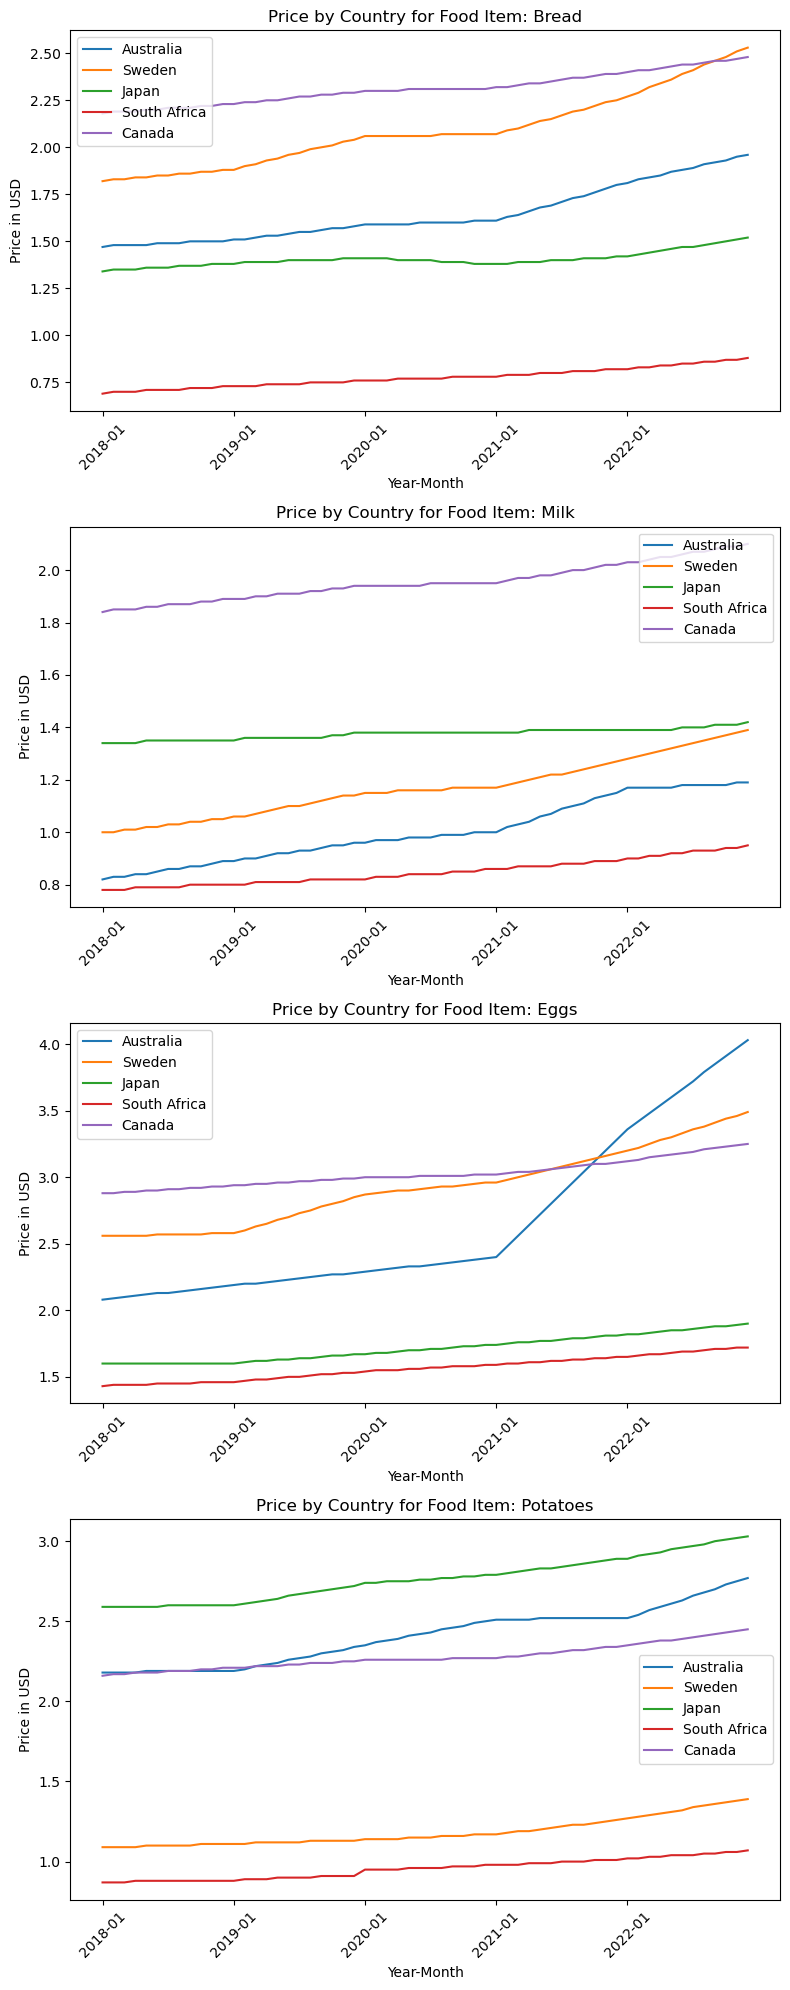

In [6]:
#Part 1: Basic Graphs of the dataset 
unique_food_items = df['Food Item'].unique()

# Create subplots dynamically based on the number of unique food items
fig, axes = plt.subplots(nrows=len(unique_food_items), ncols=1, figsize=(8, 5 * len(unique_food_items)))

# Iterate through unique food items and create subplots
for idx, food_item in enumerate(unique_food_items):
    ax = axes[idx]
    
    food_df = df[df['Food Item'] == food_item]
    
    # Iterate through unique countries for the current food item
    for country in food_df['Country'].unique():
        country_df = food_df[food_df['Country'] == country]
        x_ticks = [f"{year}-{month:02d}" for year, month in zip(country_df['Year'], country_df['Month'])]
        ax.plot(x_ticks, country_df['Price in USD'], label=country)
    
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Price in USD')
    ax.set_title(f'Price by Country for Food Item: {food_item}')
    
    # Show only every 12th tick
    visible_ticks = x_ticks[::12]
    ax.set_xticks(visible_ticks)
    
    # Rotate x-axis labels for better visibility
    ax.tick_params(axis='x', rotation=45)
    
    ax.legend()

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

I want to create line graphs here relating the percent price increase per year and the overall inflation rate in each country<br/>
Source: [IMF](https://www.imf.org/external/datamapper/PCPIPCH@WEO/WEOWORLD/AUS/ZAF/JPN/SWE/CAN)

In [7]:
#Import Inflation data by country
inflation_data = pd.read_csv("/kaggle/input/inflation-data/inflation_data.csv")
inflation_data.drop(0, axis=0, inplace=True)
inflation_data.rename(columns={"Inflation rate, average consumer prices (Annual percent change)":"Country"}, inplace=True)
inflation_data = inflation_data[["Country", "2018", "2019", "2020","2021","2022"]]
inflation_data.head()


,Country,2018,2019,2020,2021,2022
1,Australia,1.9,1.6,0.9,2.8,6.6
2,Canada,2.3,1.9,0.7,3.4,6.8
3,Japan,1.0,0.5,0.0,-0.2,2.5
4,South Africa,4.6,4.1,3.3,4.6,6.9
5,Sweden,2.0,1.7,0.7,2.7,8.1


In [8]:
#Inflation based on January 
inflation_df = df.loc[df["Month"] == 1]
inflation_df = inflation_df[["Country", "Year", "Food Item", "Price in USD"]]
def inflation_lookup(row):
    data = inflation_data.loc[inflation_data["Country"] == row["Country"]]
    val = data[str(row["Year"])].iloc[0]
    return val
    
inflation_df["Inflation"] = inflation_df.apply(inflation_lookup, axis=1)

#inflation_df["Inflation"] = inflation_df.apply(lambda x: inflation_lookup(x["Country"], x["Year"], inflation_data), axis=1)

#inflation_df = pd.concat([inflation_df, inflation_data], join="outer")
inflation_df.head()
    

,Country,Year,Food Item,Price in USD,Inflation
0,Australia,2018,Bread,1.47,1.9
12,Australia,2019,Bread,1.51,1.6
24,Australia,2020,Bread,1.59,0.9
36,Australia,2021,Bread,1.61,2.8
48,Australia,2022,Bread,1.81,6.6
